This script plots the figures for Fig. 6C, fig. S18B and fig. S20 on the effect of Mecp2 deletion on the radial positions of imaged loci across subclasses

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import sys

print(f'PID number is {os.getpid()}')

mpl.rc('figure', dpi=300)
mpl.rc('figure', titlesize=10.) 
mpl.rc('figure.constrained_layout', use=True)

mpl.rc('axes', labelsize=8.)
mpl.rc('axes', titlesize=9.)
mpl.rc('axes', linewidth=0.5)

mpl.rc('font', family='Arial')

mpl.rc('savefig', dpi=300)
mpl.rc('savefig', format='pdf')

mpl.rc('xtick', labelsize=7.)
mpl.rc('xtick.major', size=3)
mpl.rc('xtick.major', width=0.5)

mpl.rc('ytick', labelsize=7.)
mpl.rc('ytick.major', size=3)
mpl.rc('ytick.major', width=0.5)

mpl.rcParams['pdf.fonttype'] = 42

PID number is 35664


# Load rp

In [2]:
output_folder = r'E:\DNA_analysis\Postanalysis_MeCP2\radial_position'


sel_subclasses = ['L2/3 IT', 'L4/5 IT', 'L5 IT', 'L6 IT', 'L5 ET','L5/6 NP', 'L6 CT', 'Pvalb', 'Sst', 'Astro', 'Oligo', 'Endo-PVM']

df_subclass_rp = pd.read_csv(os.path.join(output_folder, 'all_subclass_rp_600pts_final.csv'),
                             index_col=0)
df_subclass_rp.head()

,loci_name,AB,WT_norm_RP,KO_norm_RP,WT_distance_to_center,KO_distance_to_center,subclass
0,chr1_3742742_3759944,B,0.789256,0.788847,3.443854,3.262680,L6b
1,chr1_6245958_6258969,B,0.787254,0.768152,3.289030,3.190698,L6b
2,chr1_8740008_8759916,B,0.836328,0.804505,3.762592,3.335970,L6b
3,chr1_9627926_9637875,B,0.810988,0.801371,3.475667,3.269239,L6b
4,chr1_9799472_9811359,B,0.815654,0.779302,3.451135,3.281017,L6b


In [3]:
df_subclass_rp['center_dist_change_KOoverWT'] = df_subclass_rp['KO_distance_to_center']-df_subclass_rp['WT_distance_to_center']

df_subclass_rp['effect'] = df_subclass_rp['center_dist_change_KOoverWT'].apply(lambda x: 'outward' if x>0 else 'inward')

In [4]:
### split the points into 5th percentile for RP

def get_upper_bound(all_values, bin_size=5):
    percentiles = np.arange(0,100, bin_size)
    percentiles = percentiles + bin_size
    upper_bound = []
    for p in percentiles:
        upper_bound.append(np.percentile(all_values, p))
    upper_bound = np.array(upper_bound)
    return upper_bound

analysis_dfs = []
for subcls in sel_subclasses:
    df = df_subclass_rp[df_subclass_rp['subclass']==subcls].copy()
    
    rp_upper_bound = get_upper_bound(df['WT_norm_RP'].values)
    
    df['RP_interval'] = df['WT_norm_RP'].apply(lambda x: np.argmax(rp_upper_bound>=x))
    
    analysis_dfs.append(df)

df_analysis = pd.concat(analysis_dfs, ignore_index=True)
df_analysis.head()

,loci_name,AB,WT_norm_RP,KO_norm_RP,WT_distance_to_center,KO_distance_to_center,subclass,center_dist_change_KOoverWT,effect,RP_interval
0,chr1_3742742_3759944,B,0.837700,0.810326,3.892021,3.877548,L2/3 IT,-0.014473,inward,17
1,chr1_6245958_6258969,B,0.840414,0.822126,3.915844,3.904488,L2/3 IT,-0.011356,inward,17
2,chr1_8740008_8759916,B,0.830338,0.794746,3.968803,3.764145,L2/3 IT,-0.204658,inward,16
3,chr1_9627926_9637875,B,0.824011,0.814497,3.869235,3.852427,L2/3 IT,-0.016808,inward,15
4,chr1_9799472_9811359,B,0.816209,0.805244,3.888839,3.878895,L2/3 IT,-0.009944,inward,15


In [5]:
np.unique(df_analysis.subclass)

array(['Astro', 'Endo-PVM', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT',
       'L5/6 NP', 'L6 CT', 'L6 IT', 'Oligo', 'Pvalb', 'Sst'], dtype=object)

# Plot change in distance to center

In [6]:
color_map = {'L2/3 IT':'navy', 'L4/5 IT':'mediumblue', 'L5 IT':'slateblue', 'L6 IT':'dodgerblue','L5 ET':'steelblue',
             'L5/6 NP':'lightsteelblue' , 'L6 CT':'cyan',
             'Pvalb':'darkgreen', 'Sst':'green',
            'Astro':'darkred', 'Oligo':'red', 'Endo-PVM':'saddlebrown'}

meta NOT subset; don't know how to subset; dropped


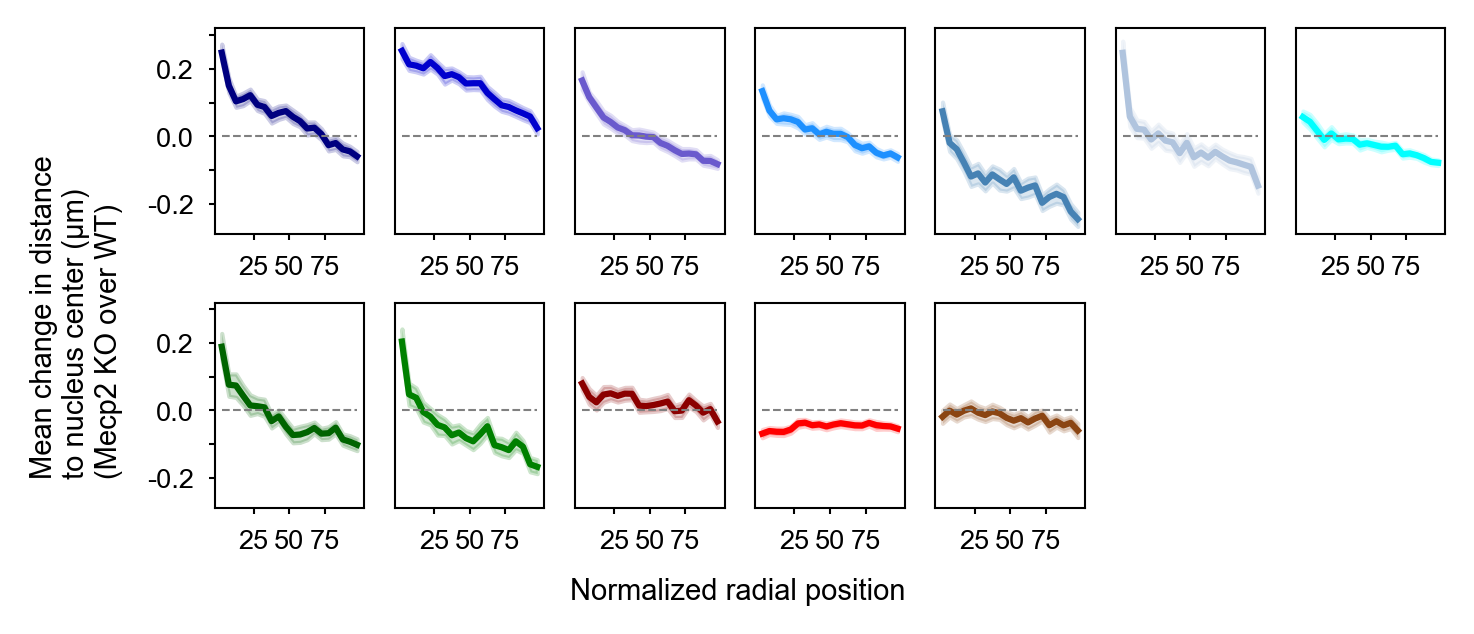

In [21]:
# This figure is related to Fig. 6C on the effect of Mecp2 deletion on the loci's distance to nucleus center
fig = plt.figure(figsize=(4.8,2), dpi=300)

for i, subcls in enumerate(sel_subclasses):
    ax = fig.add_subplot(2,7,i+1)
    
    df_plot = df_analysis[df_analysis['subclass']==subcls].copy()
    color = color_map[subcls]
    
    sns.lineplot(data=df_plot, x='RP_interval', y='center_dist_change_KOoverWT', ax=ax, color=color)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xlim(-1, 20)
    ax.set_ylim(-0.29, 0.32)
    ax.plot([0,19],[0,0], color='gray', linewidth=0.5, linestyle='--')
    
    if i==0 or i==7:
        ax.set_yticks([-0.2,-0.1,0.0,0.1,0.2,0.3],[-0.2,'',0.0,'',0.2,''], fontsize=6.5)
    else:
        ax.set_yticks([])
   
    ax.set_xticks([4.5,9.5,14.5],[25,50,75], fontsize=6.5)
    ax.tick_params(axis='both', length=1.5)
    
    
fig.supxlabel('Normalized radial position', fontsize=7)
fig.supylabel('Mean change in distance\nto nucleus center (µm)\n(Mecp2 KO over WT)', fontsize=7)

figure_name = 'change in distance to center.pdf'
plt.savefig(figure_name)

plt.show()

meta NOT subset; don't know how to subset; dropped


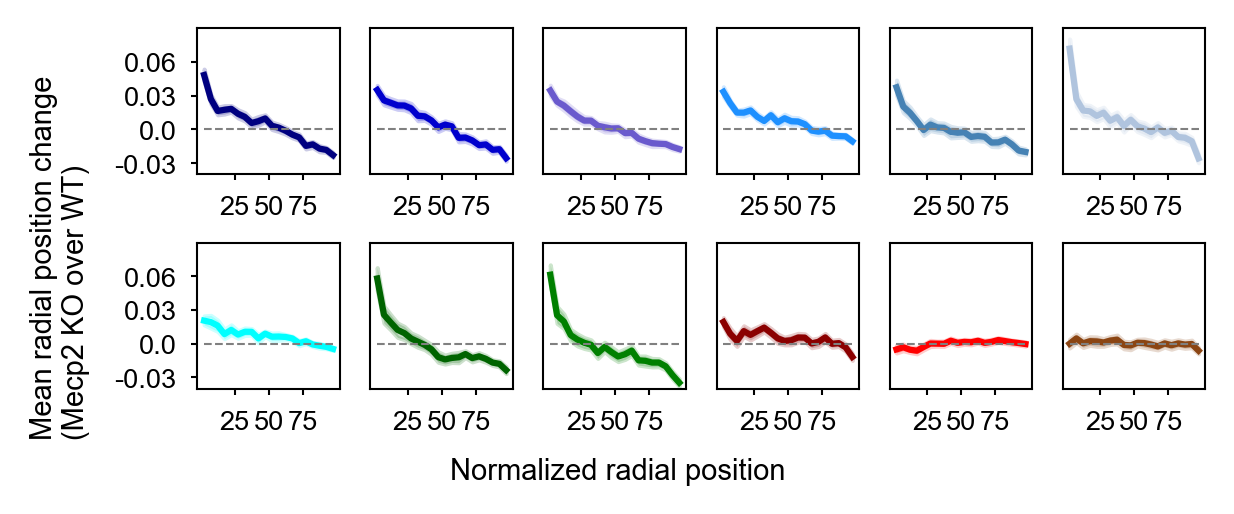

In [27]:
# This figure is related to fig. S18B on the effect of Mecp2 deletion on the loci's normalized radial positions
df_analysis['RP_change'] = df_analysis['KO_norm_RP'] - df_analysis['WT_norm_RP']

fig = plt.figure(figsize=(4,1.6), dpi=300)

for i, subcls in enumerate(sel_subclasses):
    ax = fig.add_subplot(2,6,i+1)
    
    df_plot = df_analysis[df_analysis['subclass']==subcls].copy()
    color = color_map[subcls]
    
    sns.lineplot(data=df_plot, x='RP_interval', y='RP_change', ax=ax, color=color)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xlim(-1, 20)
    ax.set_ylim(-0.04, 0.09)
    ax.plot([0,19],[0,0], color='gray', linewidth=0.5, linestyle='--')
    
    if i==0 or i==6:
        ax.set_yticks([-0.03, 0.0,0.03,0.06],[-0.03,0.0,0.03,0.06], fontsize=6.5)
    else:
        ax.set_yticks([])
    
    ax.set_xticks([])
    
    ax.set_xticks([4.5,9.5,14.5],[25,50,75], fontsize=6.5)
    ax.tick_params(axis='both', length=1.5)
    
fig.supxlabel('Normalized radial position', fontsize=7)
fig.supylabel('Mean radial position change\n(Mecp2 KO over WT)', fontsize=7)

figure_name = 'change in norm rp.pdf'
plt.savefig(figure_name)

plt.show()

# Plot AB

In [13]:
sel_subclasses_AB = ['L2/3 IT', 'L4/5 IT', 'L5 IT', 'L6 IT', 'L5 ET','L5/6 NP', 'L6 CT', 'Astro', 'Oligo', 'Endo-PVM']

In [14]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

pvals = []
for i, subcls in enumerate(sel_subclasses_AB):
    df_plot = df_analysis[df_analysis['subclass']==subcls].copy()
    df_plot = df_plot[df_plot['AB']!='unassigned'].copy()
    stats, p = ttest_ind(df_plot[df_plot.AB=='A']['center_dist_change_KOoverWT'],
                           df_plot[df_plot.AB=='B']['center_dist_change_KOoverWT'], equal_var=False)
    pvals.append(p)
reject, adj_p, _, _ = multipletests(pvals, alpha=0.05, method='bonferroni')
adj_p

array([1.03206130e-51, 1.89469151e-71, 3.27018045e-48, 1.23433698e-31,
       2.75354025e-05, 2.48851487e-07, 1.89643855e-06, 1.07716272e-09,
       9.17045287e-03, 2.53284711e-01])

C:\Users\cosmosyw\AppData\Local\Temp\ipykernel_35664\510159679.py:51: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(figure_name)
meta NOT subset; don't know how to subset; dropped
C:\Users\cosmosyw\anaconda3\envs\merlin_postanalysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


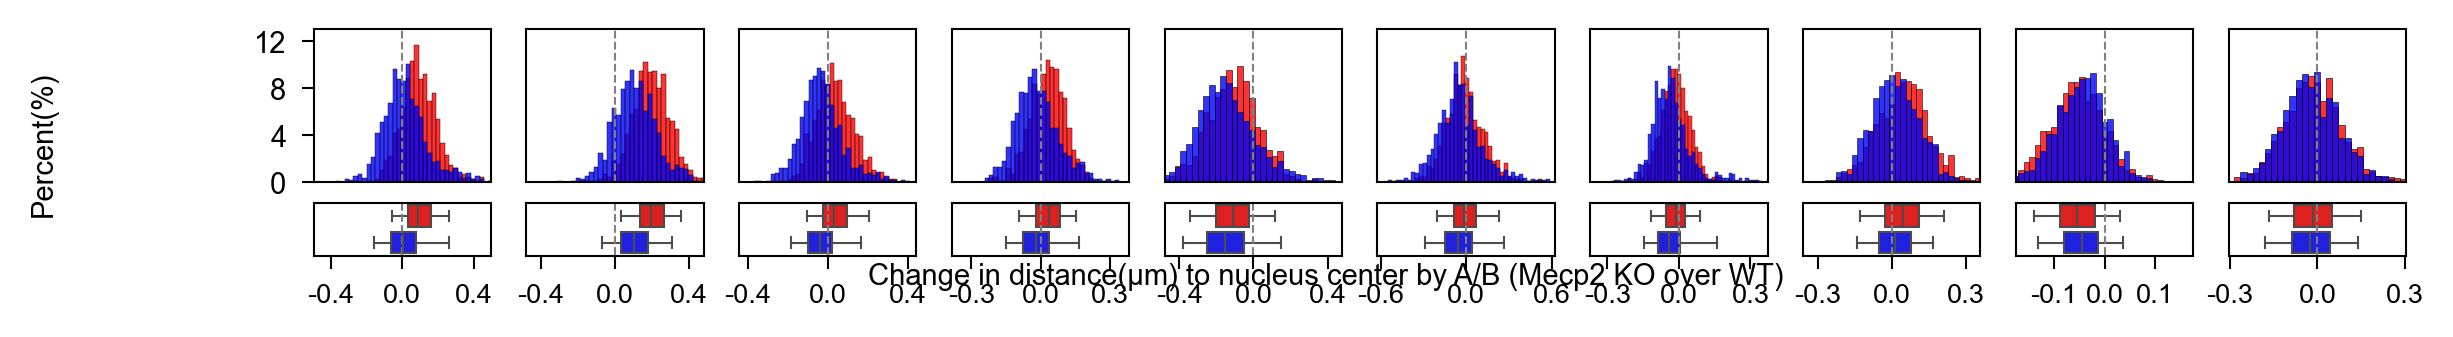

In [15]:
# this figure is related to fig. S20, on the Mecp2's deletion's effect on A and B loci
from matplotlib.gridspec import GridSpec
from math import floor
spec = GridSpec(nrows=2, ncols=10, height_ratios=[1,0.35])

fig = plt.figure(figsize=(9,1.0), dpi=300)

for i, subcls in enumerate(sel_subclasses_AB):
    ax = fig.add_subplot(spec[0,i])
    
    df_plot = df_analysis[df_analysis['subclass']==subcls].copy()
    df_plot = df_plot[df_plot['AB']!='unassigned'].copy()
    color = color_map[subcls]
    bound = max(-np.percentile(df_plot['center_dist_change_KOoverWT'].values, 1), np.percentile(df_plot['center_dist_change_KOoverWT'].values, 99.9))
    ax.set_ylim(0,13)
    ax.set_xlim(-bound,bound)
    
    sns.histplot(data=df_plot, x='center_dist_change_KOoverWT', hue='AB', ax=ax, 
                 palette={'A':'red', 'B':'blue'}, legend=False, alpha=0.8, stat='percent', common_norm=False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    
    if i==0:
        ax.set_yticks([0,4,8,12],fontsize=6.5)
    else:
        ax.set_yticks([])
    
    ax.set_xticks([])
    
    #ax.text(-0.28, 110, subcls, fontsize=7)
    ax.plot([0,0],[0,13], linewidth=0.5, color='gray', linestyle='--')
    
    
    ax2 = fig.add_subplot(spec[1,i])
    sns.boxplot(data=df_plot, x='center_dist_change_KOoverWT', y='AB', ax=ax2, fliersize=0, linewidth=0.5,order = ['A','B'],
                 palette={'A':'red', 'B':'blue'}, whis=[5,95])
    ax2.set_yticks([])
    ax2.set_xticks([])
    ax2.set_ylabel(None)
    ax2.set_xlabel(None)
    
    ax2.set_xlim(-bound,bound)
    tick = floor(bound*10)/10
    ax2.set_xticks([-tick,0,tick],[-tick,0.0,tick],fontsize=6.5)
    ax2.plot([0,0],[-0.5,1.5], linewidth=0.5, color='gray', linestyle='--')
    
fig.supxlabel('Change in distance(µm) to nucleus center by A/B (Mecp2 KO over WT)', fontsize=7)
fig.supylabel('Percent(%)', fontsize=7)

figure_name = 'AB loci distance change to center.pdf'
plt.savefig(figure_name)

plt.show()